# IT-542 PRML Assignment - 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Fixing a seed for reproducibility
np.random.seed(202011032)

## (1) Draw 100 samples from uni-variate Normal distribution, plot its histogram. Compute pdf for univariate normal distribution and compare it with histogram. Repeat experiment with 500, 1000 data points.

### a) Drawing 100, 500, and 1000 samples from uni-variate normal distribution.

In [2]:
samples100 = np.random.randn(100)
samples500 = np.random.randn(500)
samples1000 = np.random.randn(1000)

# Univariate normal distribution pdf
def get_uninorm_pdf(x_list):
    mu, sigma = 0.0, 1.0
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( -(x_list - mu)**2 / (2 * sigma**2) )

# Plot histogram with its univariate normal distribution pdf
def plot_hist_pdf(samples, n_samples):
    plt.figure()
    # Creates a plots a histogram of samples with n_samples bins or histogram bars
    _, hists, _ = plt.hist(samples, 30, density=True)

    # Plots univariate normal pdf for the histogram
    plt.plot(hists, get_uninorm_pdf(hists), linewidth=2, color='r')
    plt.title(f"Histogram of {n_samples} samples with its PDF")
    plt.show()

### b) Plotting respective histograms and comparing with pdf of univariate normal distribution
The histograms get more and more accurate to univariate normal distribution as the samples drawn increases.

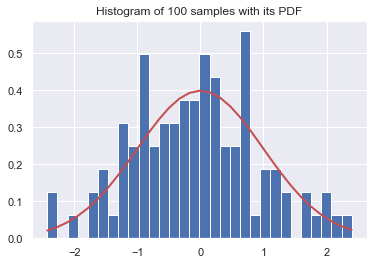

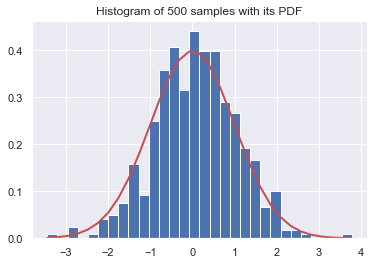

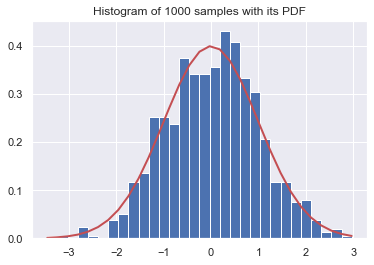

In [3]:
plot_hist_pdf(samples100, 100)
plot_hist_pdf(samples500, 500)
plot_hist_pdf(samples1000, 1000)

## (2) Draw 100 samples from bi-variate Normal distribution. Repeat experiment 1.

In [4]:
np.random.seed(202011032)
# Drawing 100, 500, and 1000 samples from Bi-Variate Normal distribution
means = np.array([0, 0])
covMatrix = np.array([[1, 0], [0, 1]])
samplesBi100 = np.random.multivariate_normal(means.reshape(2,), covMatrix, 100).T
samplesBi500 = np.random.multivariate_normal(means.reshape(2,), covMatrix, 500).T
samplesBi1000 = np.random.multivariate_normal(means.reshape(2,), covMatrix, 1000).T
# print(samplesBi100)

### a) Plotting Contours from samples drawn from bivariate normal along with their univariate normals on top and sides.
We use `seaborn.jointplot` to plot the distribution as contour and it also helps in plotting the univariate distribution in top and sides.
We can see the contour getting more and more accurate to bivariate normal contour as the samples drawn increases.

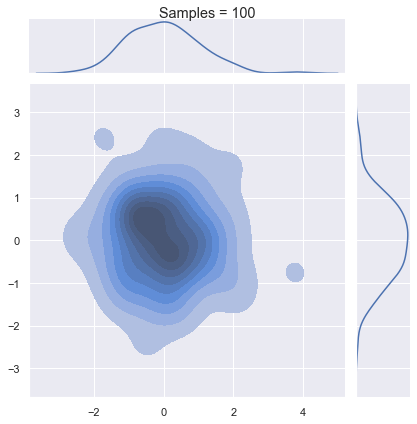

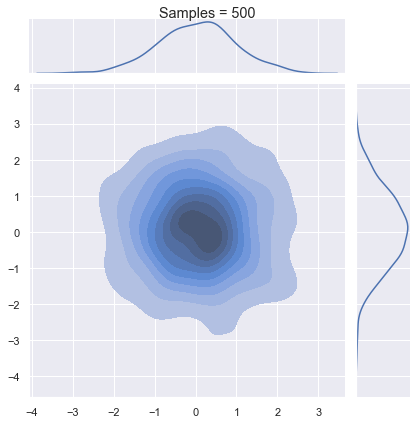

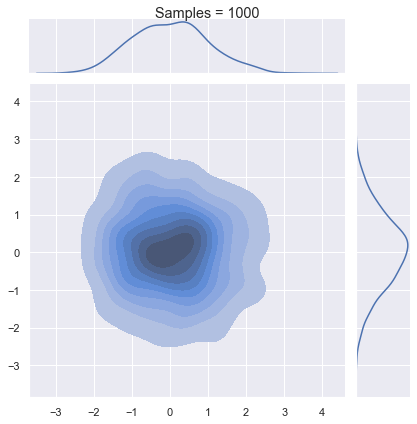

In [5]:
p = sns.jointplot(x=samplesBi100[0], y=samplesBi100[1], kind='kde', shade=True)
p.fig.suptitle("Samples = 100")
p.fig.subplots_adjust(top=0.95)

p = sns.jointplot(x=samplesBi500[0], y=samplesBi500[1], kind='kde', shade=True)
p.fig.suptitle("Samples = 500")
p.fig.subplots_adjust(top=0.95)

p = sns.jointplot(x=samplesBi1000[0], y=samplesBi1000[1], kind='kde', shade=True)
p.fig.suptitle("Samples = 1000")
p.fig.subplots_adjust(top=0.95)

### b) Plotting histograms of the samples along with a density colorbar.
`plt.hist2d` is used to plot the histogram for bivariate normal samples.
We can see the histogram getting more and more accurate as the samples drawn increases.

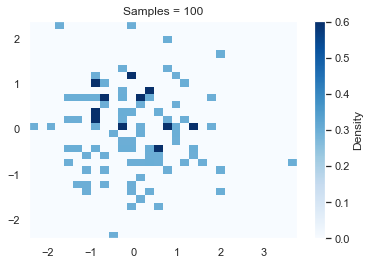

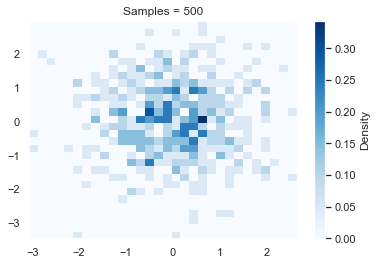

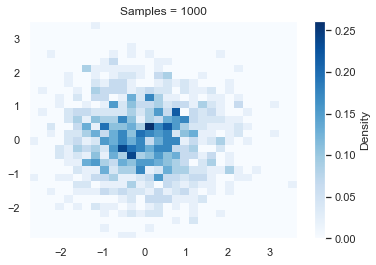

In [6]:
plt.hist2d(samplesBi100[0], samplesBi100[1], bins=30, density=True, cmap='Blues')
cb100 = plt.colorbar()
cb100.set_label("Density")
plt.title("Samples = 100")
plt.show()

plt.hist2d(samplesBi500[0], samplesBi500[1], bins=30, density=True, cmap='Blues')
cb500 = plt.colorbar()
cb500.set_label("Density")
plt.title("Samples = 500")
plt.show()

plt.hist2d(samplesBi1000[0], samplesBi1000[1], bins=30, density=True, cmap='Blues')
cb1000 = plt.colorbar()
cb1000.set_label("Density")
plt.title("Samples = 1000")
plt.show()

## (3) Do following:
### 1. Implement central limit theorem.
### 2. Draw 12 samples from Uni(0,1) as a sample population and perform CLT.
### 3. Observe the distribution of sample means.

### According to the Central Limit Theorem, for 12 iid uniform random variables with a = 0, b = 1,
$\sum^{12}_{i=1} X_{i} - 6 \sim N(0, 1) \ \ \forall X_{i} \sim Uni(0, 1)$

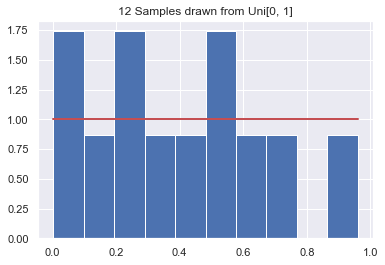

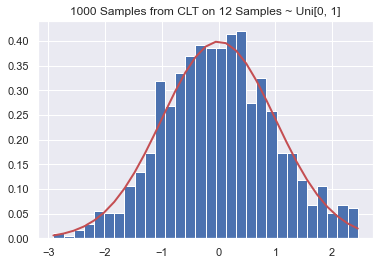

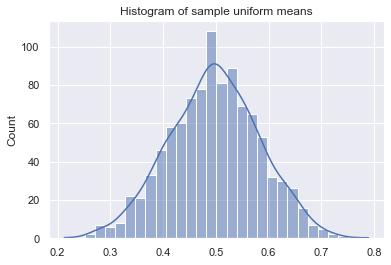

In [7]:
# Drawing 12 samples from Uniform distribution Uni[0, 1] and performing CLT.
np.random.seed(202011032)

uniSamples = np.random.uniform(0, 1, 12)
_, histsU, _ = plt.hist(uniSamples, density=True)
plt.plot(histsU, [1]*len(histsU), linewidth=2, color='r')
plt.title("12 Samples drawn from Uni[0, 1]")
plt.show()

# Performing CLT on 12 Uni[0, 1] samples and generating 1000 such samples with different uniform samples each time
normalSamples = [np.sum(np.random.uniform(0, 1, 12)) - 6 for _ in range(1000)]

# Plot histogram of samples drawn from CLT
_, histsN, _ = plt.hist(normalSamples, 30, density=True)

# Plots univariate normal pdf for the histogram
plt.plot(histsN, get_uninorm_pdf(histsN), linewidth=2, color='r')
plt.title("1000 Samples from CLT on 12 Samples ~ Uni[0, 1]")
plt.show()

means = [np.mean(np.random.uniform(0, 1, 12)) for _ in range(1000)]
sns.histplot(means, bins=30, kde=True, alpha=0.5)
plt.title("Histogram of sample uniform means")
plt.show()

**1. As we can observe from the above graphs, the samples drawn from the Central Limit Theorem applied on the uniform distribution samples are following the standard normal distribution $N(0, 1)$.**

**2. Plotting a histogram of sample means of those $Uni(0, 1)$ samples, we can see that we get a curve similar to normal distribution.**

## (4) Use Box-Muller method to achieve Normal distribution.
Let $X_{1} \sim Uni(0, 1)$ and $X_{2} \sim Uni(0, 1)$ be two identically independent random variables.

**Box-Muller** method tells that,<br>
$U_{1} = \sqrt{-2 \ln{X_{1}}} \ \cos{2 \pi X_{2}} \ \sim \ N(0, 1)$ and <br>
$U_{2} = \sqrt{-2 \ln{X_{2}}} \ \sin{2 \pi X_{2}} \ \sim \ N(0, 1)$ <br>
where $U_{1}$ and $U_{2}$ are independent standard normal random variables.

U1: Mean: 0.0483426571863709, Variance: 1.0249503706939447
U2: Mean: 0.0988250080338909, Variance: 1.176106744733248


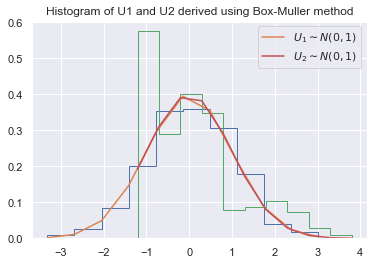

In [8]:
np.random.seed(202011032)
x1, x2 = np.random.uniform(0, 1, (1000, 2)).T

u1 = np.sqrt(-2 * np.log(x1)) * np.cos(2 * np.pi * x2)
u2 = np.sqrt(-2 * np.log(x2)) * np.cos(2 * np.pi * x2)

print(f"U1: Mean: {np.mean(u1)}, Variance: {np.var(u1)}")
print(f"U2: Mean: {np.mean(u2)}, Variance: {np.var(u2)}")

_, h, _ = plt.hist(u1, density=True, histtype='step')
plt.plot(h, get_uninorm_pdf(h), label="$U_{1} \sim N(0, 1)$")


_, h, _ = plt.hist(u2, density=True, histtype='step')
plt.plot(h, get_uninorm_pdf(h), label="$U_{2} \sim N(0, 1)$")
plt.legend(loc="best")
plt.title("Histogram of U1 and U2 derived using Box-Muller method")
plt.show()